In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV

In [2]:
#Load data
train = pd.read_csv("santander-customer-transaction-prediction/train.csv")
target = pd.read_csv("santander-customer-transaction-prediction/test.csv")

In [3]:
#Let's check for null values
train.isnull().values.any()

False

In [4]:
target.isnull().values.any()

False

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
target.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


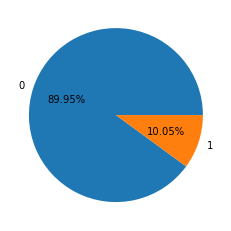

In [8]:
#Checking there ration of the data in target
plt.pie(train["target"].value_counts(), labels=train["target"].unique(), autopct="%0.2f%%")
plt.show()

In [10]:
#There is a data imbalance.

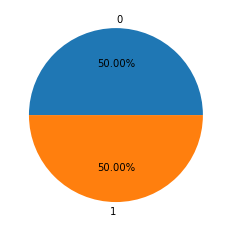

In [9]:
#Data Exploration using SMOTE
smote = SMOTE()
x = train.drop(["target", "ID_code"], axis=1)
y = train["target"]
x_smote, y_smote = smote.fit_resample(x, y)
plt.pie(y_smote.value_counts(), labels=y_smote.unique(), autopct="%0.2f%%")
plt.show()

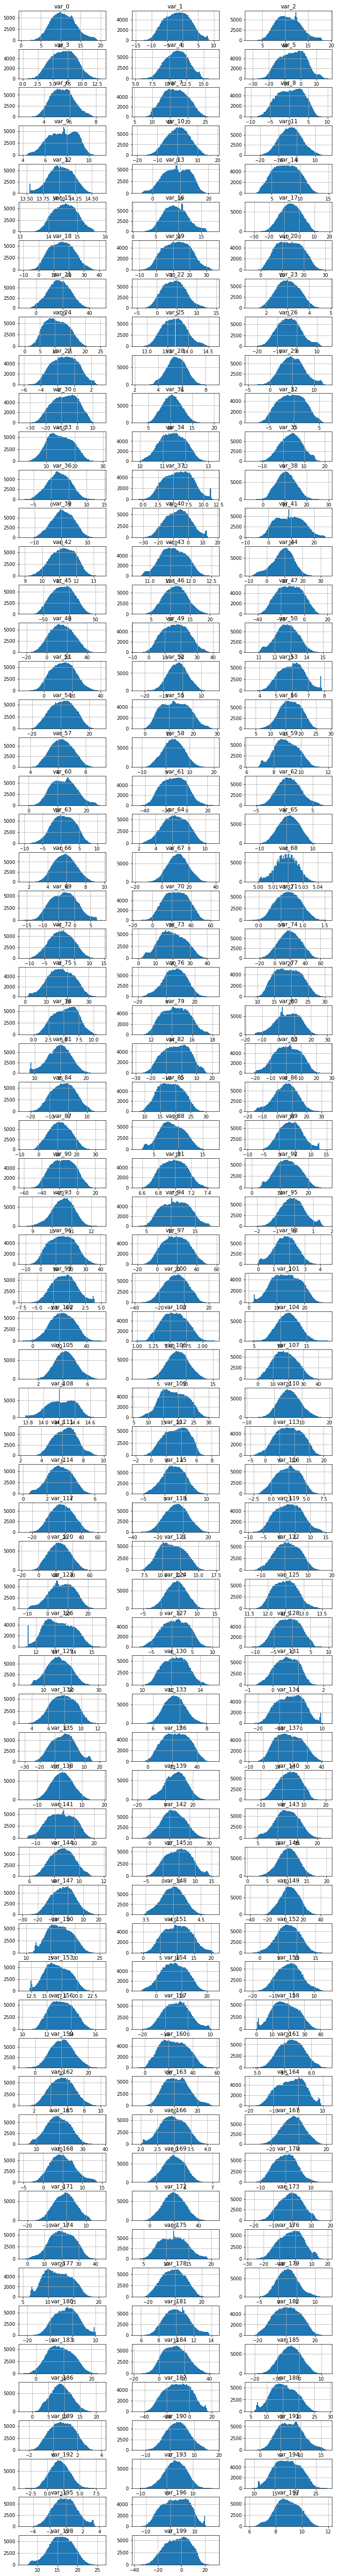

In [10]:
x.hist(bins=80, figsize=(12,300), layout=(200, 3));

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


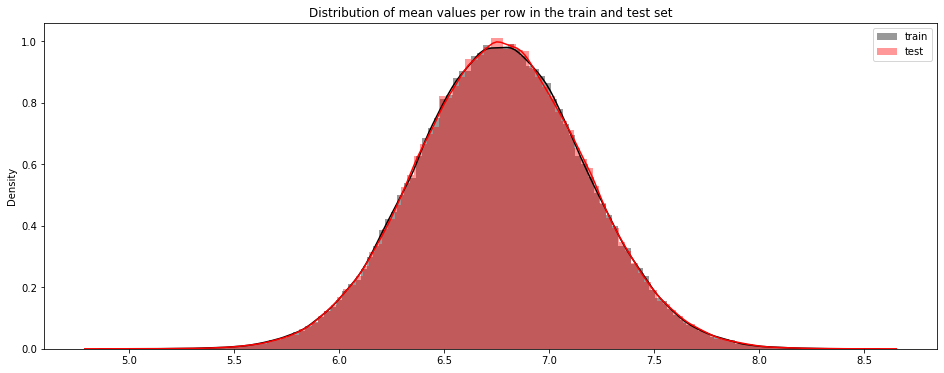

In [13]:
col_features = train.drop(['ID_code','target'],axis=1)
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")

sns.distplot(train[col_features.columns].mean(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(target[col_features.columns].mean(axis=1),color="red", kde=True,bins=120, label='test')

plt.legend()
plt.show()

In [15]:
#Split data 80/20
train_data, train_test, target_data, target_test = train_test_split(x, y, test_size=0.20, random_state=42)

columns = train_data.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(train_data)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(train_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

In [16]:
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

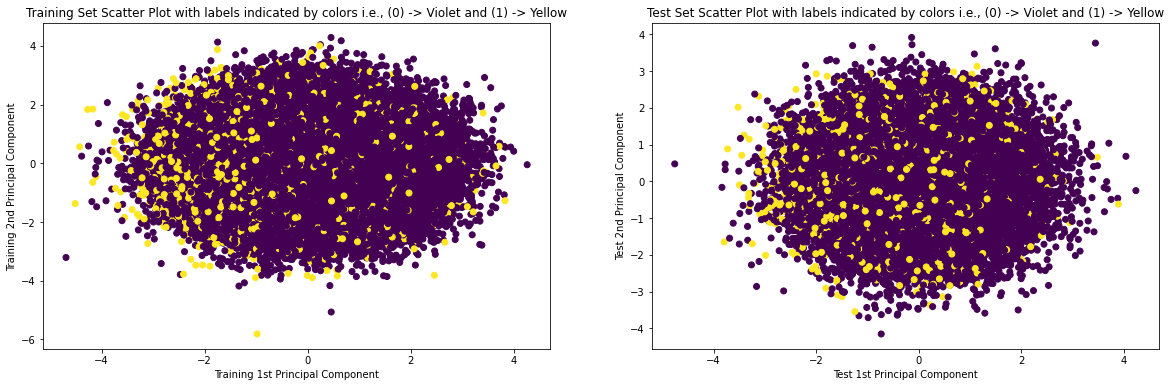

In [17]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = target_data)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = target_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [14]:

#Logistic Regression
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=3000)

#Training the model on the train data
logreg.fit(train_data, target_data)

#Making the prediction
target_prediction = logreg.predict(train_test)

print('Accuracy of logistic regression classifier on train set:')
print(logreg.score(train_data, target_data))

print('Accuracy of logistic regression classifier on test set:')
print(logreg.score(train_test, target_test))
print()
print("F1 Score")
f1 = f1_score(target_test, target_prediction)
print(f1)
print()
print('Precision score',np.round(precision_score(target_test,target_prediction),2))
print('Recall score',np.round(recall_score(target_test,target_prediction),2))


Accuracy of logistic regression classifier on train set:
0.9149
Accuracy of logistic regression classifier on test set:
0.912725

F1 Score
0.3852790984328227

Precision score 0.69
Recall score 0.27


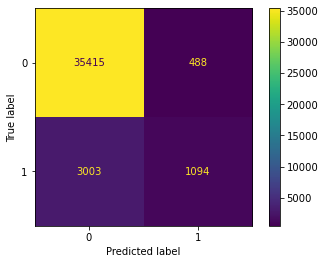

In [18]:
cnf_matrix = metrics.confusion_matrix(target_test, target_prediction)
disp_reg = metrics.ConfusionMatrixDisplay(cnf_matrix, display_labels=logreg.classes_)
disp_reg.plot()
plt.show()

In [109]:
#Split data 80/20
train_data_smote, train_test_smote, target_data_smote, target_test_smote = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)

columns = train_data_smote.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(train_data_smote)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(train_test_smote)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

In [110]:
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

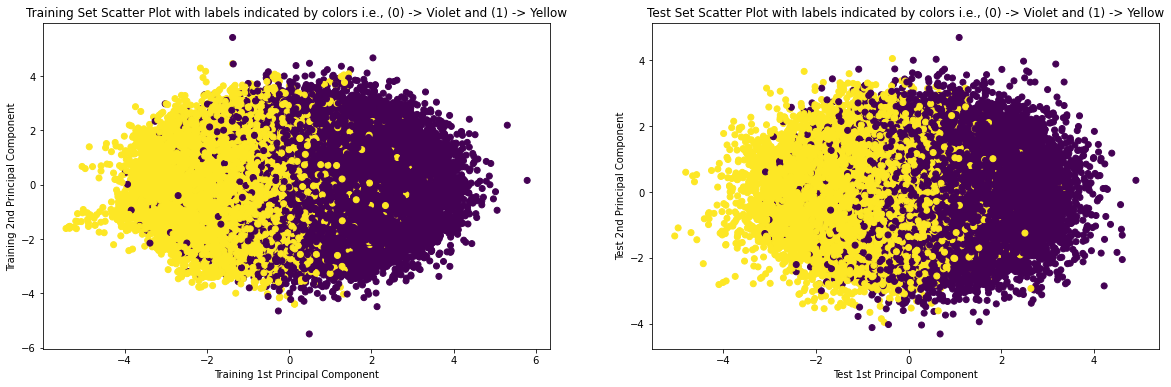

In [112]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = target_data_smote)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = target_test_smote)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [63]:

#Logistic Regression
logreg_smote = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=3000)

#Training the model on the train data
logreg_smote.fit(train_data, target_data)

#Making the prediction
target_prediction_smote = logreg.predict(train_test_smote)

print('Accuracy of logistic regression classifier on train set:')
print(logreg_smote.score(train_data_smote, target_data_smote))

print('Accuracy of logistic regression classifier on test set:')
print(logreg_smote.score(train_test_smote, target_test_smote))
print()
print("F1 Score")
f1_smote = f1_score(target_test_smote, target_prediction_smote)
print(f1_smote)
print()
print('Precision score',np.round(precision_score(target_test_smote,target_prediction_smote),2))
print('Recall score',np.round(recall_score(target_test_smote,target_prediction_smote),2))

Accuracy of logistic regression classifier on train set:
0.6064764472299136
Accuracy of logistic regression classifier on test set:
0.6055919178443879

F1 Score
0.3612836438923396

Precision score 0.94
Recall score 0.22


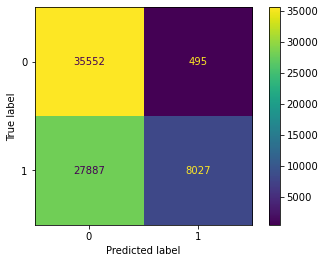

'\n35,552 True positive predictions. \n495 False negative predictions.\n27887 False postive\n8027 True negative predictions\n'

In [62]:
disp_reg_smote = metrics.ConfusionMatrixDisplay(cnf_matrix_2, display_labels=logreg_smote.classes_)
disp_reg_smote.plot()
plt.show()

In [107]:
# sns.regplot(x=target_prediction_smote , y=target_test_smote, data=train, logistic=True, ci=None)
print(train_data_smote.shape)
print(target_data_smote.shape)

(287843, 200)
(287843,)


After running both models with we can see that the first model
that has the data imbalance yields more accurate predictions than 
the model with the fixed imbalance data.

Based on the confusion matrix for both models the first model is more reliable with the predictions than with the model that uses SMOTE. In the first model, we have 35,415 True predictions where as in the second model we have 35,552. Although, the second model appear to do better true predictions but if we look at the False positive predcitons they exponentially increase from a few thousands to a couple of 10s of thousand. This tells us that the second model is less acurrate because it classifies a lot more true outcomes as false.

This is surprise as usually dataset with imbalance data performs worse overall than that of balanced data. By calculating the F1 scores of the two models we can see that the F1 score for the first model is slightly better than the one that uses SMOTE to balance the data.